# Module 2 Unit 3
## Fit a tree-based model

Insert your code after `### YOUR CODE HERE`, and then remove `raise NotImplementedError()` to indicate that you have added code.  
**NOTE:** This notebook will not be graded, but you should submit it when you submit your assignment, so that the tutor team can see how you arrived at your answers.



In [25]:
# Import libraries
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, plot_tree 
import matplotlib.pyplot as plt

The California housing data was obtained from [Kaggle](https://www.kaggle.com/camnugent/california-housing-prices). The dataset is licensed under a [CC0 1.0](https://creativecommons.org/publicdomain/zero/1.0/) license.


In [26]:
# Import data
df = pd.read_csv('California Housing Data.csv', delimiter = ",")

In [27]:
# Explore the size of the data set
# YOUR CODE HERE
df.shape

(20640, 10)

In [28]:
# Explore the type of data and feature names
# YOUR CODE HERE
df.columns




Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [29]:
# Explore the type of data and feature names
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [30]:
# Explore the type of data and feature names
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [31]:
# Explore the type of data and feature names
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [32]:
# Explore the type of data and feature names
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [33]:
#checking for any null values
print(df.isnull().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


With this data set, you should use `longitude` and `latitude` as features and `median_house_value` as the response.

In [34]:
# Split data into features (X) and response (y)
# YOUR CODE HERE
X = df.loc[:,["longitude", "latitude"]]
y = df.loc[:,["median_house_value"]]



In [35]:
X.head()



,longitude,latitude
0,-122.23,37.88
1,-122.22,37.86
2,-122.24,37.85
3,-122.25,37.85
4,-122.25,37.85


In [36]:
y.tail()

,median_house_value
20635,78100.0
20636,77100.0
20637,92300.0
20638,84700.0
20639,89400.0


In [37]:
# Fit data to tree-based regression model
regressor = DecisionTreeRegressor(random_state=0)
# YOUR CODE HERE
regressor = regressor.fit(X,y)

The rest of the code has been completed for you. Execute the cells to visualise the decision tree.

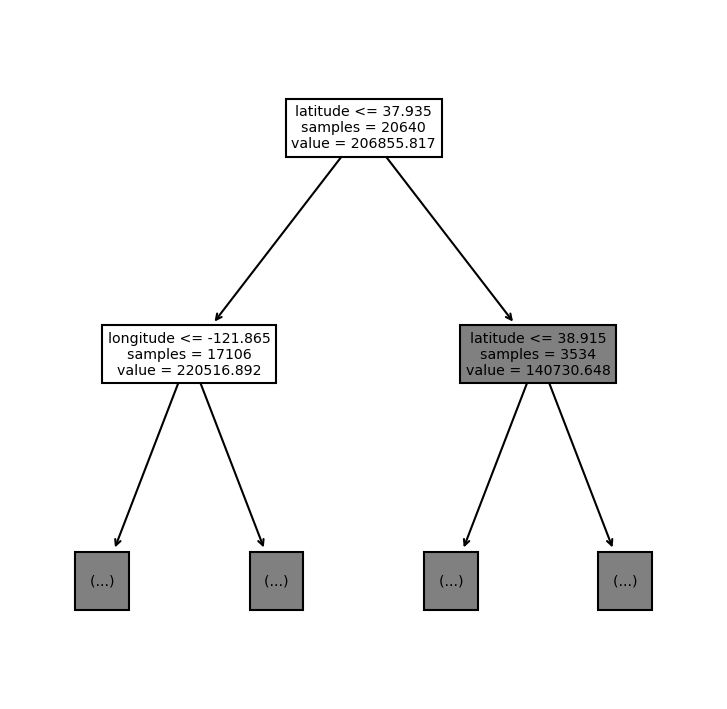

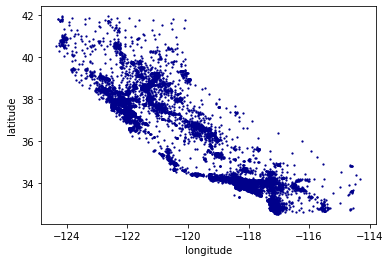

In [38]:
# Visualising the decision tree regression results
plt.figure(figsize=(6,6), dpi=150)
plot_tree(regressor,max_depth=1,feature_names=X.columns, impurity=False)
plt.show()

# A scatter plot of latitude vs longitude
df.plot.scatter(x='longitude',y='latitude',c='DarkBlue',s=1.5)

Continue to the activity to interpret these results.